# PA 4: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID:   Sudharsan Srinivasan (1001755919)                  <-------only this student will upload the assignment


Team member name and ID: Wajid Ahammed Syed (1001756597)

NO REPORT REQUIRED


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA4'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA4.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA4'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA4'  

Step 4: Your submission folder should include ONLY the following files:
    * apriory.py,
    * lastname_firstname_yourNetID_PA4.ipynb, 
    * dataset.csv,
    * toyDS.csv

Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'lastname_firstname_yourNetID_PA4.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [43]:
# Import your Libraries
import pandas as pd
import csv
import apriori
from apriori import (
    getItemSetTransactionList,
    dataFromFile,
    joinSet,
    printResults,
    returnItemsWithMinSupport,
    runApriori,
    subsets,
)


### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


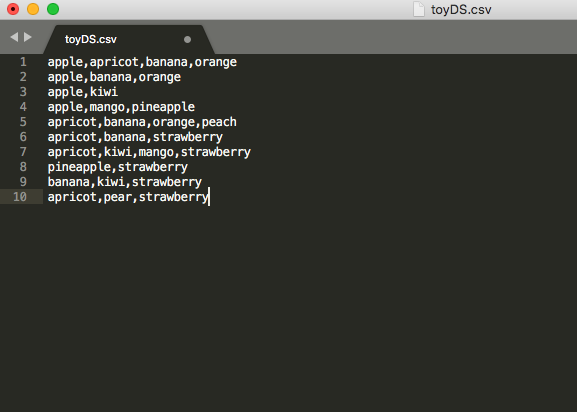

In [44]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [45]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
updated_data =[[]]
longest_column=0
name_trans=['date','transaction','item']   
data = pd.read_csv('dataset_group.csv',header=None,names=name_trans)
new_data=data.drop(['date'],axis=1) 
trans_keys=new_data.groupby(['transaction']).groups.keys()
print("Updating to transaction Data....")
#incrementing each transaction with a variable length
for i in range(len(new_data)):
    if(len(updated_data)<((new_data.values[i][0]))):
        updated_data.append([])
    updated_data[(new_data.values[i][0])-1].append(new_data.values[i][1])
#retrieving csv data for different column numbers
    if(len(updated_data[(new_data.values[i][0])-1])>longest_column):
        longest_column=len(updated_data[(new_data.values[i][0])-1])
new_dataset=open('dataset.csv', mode='w',newline='')
#updating into the new dataset
for j in updated_data:
     data_writer = csv.writer(new_dataset,delimiter=',')     
     data_writer.writerow(j)
new_dataset.close()
print("Dataset is updated....")
print("Longest Column = ", longest_column)

Updating to transaction Data....
Dataset is updated....
Longest Column =  34


In [46]:
# # #  Solution  # # #
#reading the preprocessed csv file for varying column number
data=pd.read_csv('dataset.csv',header=None,names= list(range(longest_column)))


updated_data =[[]]
p=0 #to discard NAN
for i in data.values:
    updated_data.append([])
    for j in i:
        if(str(j) != "NaN"):
            updated_data[p].append(j)
    p=p+1
for i, v in enumerate(data.values[:7]):
    print(i, '   '  ,' , '.join([str(j) for j in v]))
    print()

0     yogurt , pork , sandwich bags , lunch meat , all- purpose , flour , soda , butter , vegetables , beef , aluminum foil , all- purpose , dinner rolls , shampoo , all- purpose , mixes , soap , laundry detergent , ice cream , dinner rolls , nan , nan , nan , nan , nan , nan , nan , nan , nan , nan , nan , nan , nan , nan

1     toilet paper , shampoo , hand soap , waffles , vegetables , cheeses , mixes , milk , sandwich bags , laundry detergent , dishwashing liquid/detergent , waffles , individual meals , hand soap , vegetables , individual meals , yogurt , cereals , shampoo , vegetables , aluminum foil , tortillas , mixes , nan , nan , nan , nan , nan , nan , nan , nan , nan , nan , nan

2     soda , pork , soap , ice cream , toilet paper , dinner rolls , hand soap , spaghetti sauce , milk , ketchup , sandwich loaves , poultry , toilet paper , ice cream , ketchup , vegetables , laundry detergent , spaghetti sauce , bagels , soap , ice cream , shampoo , lunch meat , cereals , spaghet

### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [47]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #\n') 
items, rules = runApriori(updated_data, 0.15, 0.8)
print ('Case 1 (minimum support=0.15 and minimum confidence=0.8)\n')
print ('Case 1 Reasoning:\n\nFor this case, the minimum support value = 15% (0.15) and minimum confidence = 80% (0.8).\nThis instance chooses items which has an occurrence frequency count greater than or equal to 0.15. \nThe support value of 0.15 gives more valid itemset.\nMin Support is similar to Recall metric, a rule with high support means it has higher probability of being present in the dataset.\n\nMinimum confidence value is 0.8 which means that the probability of occurrence of {Y} given {X} is present is 80%.\nThis inturn determines the rules that will be formed from the itemsets. \nConfidence is similar to Precision metric, a rule with high confidence means it has high precision whenever the rule appears.\n\nHaving higher confidence value will generally result in lesser number of rules being formed ')
print('\nCase 1 Output:')
printResults(items,rules)

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #

Case 1 (minimum support=0.15 and minimum confidence=0.8)

Case 1 Reasoning:

For this case, the minimum support value = 15% (0.15) and minimum confidence = 80% (0.8).
This instance chooses items which has an occurrence frequency count greater than or equal to 0.15. 
The support value of 0.15 gives more valid itemset.
Min Support is similar to Recall metric, a rule with high support means it has higher probability of being present in the dataset.

Minimum confidence value is 0.8 which means that the probability of occurrence of {Y} given {X} is present is 80%.
This inturn determines the rules that will be formed from the itemsets. 
Confidence is similar to Precision metric, a rule with high confidence means it has high precision whenever the rule appears.

Having higher confidence value will generally result in lesser number rules being formed 

Case 1 Output:

------------ITEMS-----------------
item: ('soda', 'mixes') , 0.15

In [48]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #\n') 
items, rules = runApriori(updated_data, 0.17, 0.6)
print ('Case 2 (minimum support=0.17 and minimum confidence=0.6)\n') 
print ('Case 2 Reasoning:\n\nFor this case, the minimum support value = 17% (0.17) and minimum confidence = 60% (0.6).\nThis instance chooses items which has an occurrence frequency count greater than or equal to 0.17.\nIn this case, the minimum support value is increased and the minimum confidence value is decreased.\n\nThis results in more rules being formed between the itemsets in the dataset.')
print('\nCase 2 Output:')
printResults(items,rules)

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #

Case 2 (minimum support=0.17 and minimum confidence=0.6)

Case 2 Reasoning:

For this case, the minimum support value = 17% (0.17) and minimum confidence = 60% (0.6).
This instance chooses items which has an occurrence frequency count greater than or equal to 0.17.
In this case, the minimum support value is increased and the minimum confidence value is decreased.

This results in more rules being formed between the itemsets in the dataset.

Case 2 Output:

------------ITEMS-----------------
item: ('milk', 'dishwashing liquid/detergent') , 0.170
item: ('beef', 'poultry') , 0.170
item: ('paper towels', 'ice cream') , 0.170
item: ('individual meals', 'poultry') , 0.170
item: ('juice', 'shampoo') , 0.170
item: (nan, 'cereals', 'mixes') , 0.170
item: ('toilet paper', 'poultry') , 0.171
item: ('dinner rolls', 'soda') , 0.171
item: ('tortillas', 'poultry') , 0.171
item: ('dinner rolls', 'cereals') , 0.171
item: ('spaghetti sauce', 

In [49]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #\n') 
items, rules = runApriori(updated_data, 0.19, 0.4)
print ('Case 3 (minimum support=0.19 and minimum confidence=0.4)\n')
print ('Case 3 Reasoning:\n\nFor this case, the minimum support value = 19% (0.19) and minimum confidence = 40% (0.4).\nThis instance chooses items which has an occurrence frequency count greater than or equal to 0.19.\nIn this case, the minimum support value is further increased and the minimum confidence value is further decreased. \nThis results in more rules being formed between the itesmets in the dataset.\n\nTherefore we can conclude the following:\n\nIncrease in the minimum support value will result in higher probability of transaction between two items in a dataset.\n\nIncrease in the minimum confidence value will result in lesser rules being formed between the itemsets in the dataset.')
print ('\nCase 3 Output:')
printResults(items,rules)

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #

Case 3 (minimum support=0.19 and minimum confidence=0.4)

Case 3 Reasoning:

For this case, the minimum support value = 19% (0.19) and minimum confidence = 40% (0.4).
This instance chooses items which has an occurrence frequency count greater than or equal to 0.19.
In this case, the minimum support value is further increased and the minimum confidence value is further decreased. 
This results in more rules being formed between the itesmets in the dataset.

Therefore we can conclude the following:

Increase in the minimum support value will result in higher probability of transaction between two items in a dataset.

Increase in the minimum confidence value will result in lesser rules being formed between the itemsets in the dataset.

Case 3 Output:

------------ITEMS-----------------
item: ('dinner rolls', 'poultry') , 0.195
item: (nan, 'vegetables', 'pork') , 0.256
item: ('vegetables', nan, 'hand soap') , 0.258
item: ('flour

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [30 points] - Evaluate Results 
